# Preprocess data

In [0]:
import pandas as pd
df = pd.read_csv('apple_5days_data.csv')

In [0]:
df.head()

,Time stamp,Open,Close,High,Low,Volume
0,2020-02-14 15:59:00,324.83,324.95,324.95,324.67,282969.0
1,2020-02-14 15:58:00,324.80,324.82,324.96,324.76,149813.0
2,2020-02-14 15:57:00,324.98,324.80,324.99,324.77,147054.0
3,2020-02-14 15:56:00,324.91,324.97,325.00,324.85,113817.0
4,2020-02-14 15:55:00,324.97,324.89,324.99,324.78,148127.0


In [0]:
lag_labels = ['Open','Close','High','Low','Volume']
for label in lag_labels:
  for i in range(3):
    df[label+'_lag_'+str(i+1)] = df[label].shift(-(i+1))
df.head()

,Time stamp,Open,Close,High,Low,Volume,Open_lag_1,Open_lag_2,Open_lag_3,Close_lag_1,Close_lag_2,Close_lag_3,High_lag_1,High_lag_2,High_lag_3,Low_lag_1,Low_lag_2,Low_lag_3,Volume_lag_1,Volume_lag_2,Volume_lag_3
0,2020-02-14 15:59:00,324.83,324.95,324.95,324.67,282969.0,324.80,324.98,324.91,324.82,324.80,324.97,324.96,324.99,325.00,324.76,324.77,324.85,149813.0,147054.0,113817.0
1,2020-02-14 15:58:00,324.80,324.82,324.96,324.76,149813.0,324.98,324.91,324.97,324.80,324.97,324.89,324.99,325.00,324.99,324.77,324.85,324.78,147054.0,113817.0,148127.0
2,2020-02-14 15:57:00,324.98,324.80,324.99,324.77,147054.0,324.91,324.97,324.52,324.97,324.89,324.97,325.00,324.99,324.99,324.85,324.78,324.51,113817.0,148127.0,245288.0
3,2020-02-14 15:56:00,324.91,324.97,325.00,324.85,113817.0,324.97,324.52,324.40,324.89,324.97,324.51,324.99,324.99,324.54,324.78,324.51,324.33,148127.0,245288.0,89159.0
4,2020-02-14 15:55:00,324.97,324.89,324.99,324.78,148127.0,324.52,324.40,324.33,324.97,324.51,324.38,324.99,324.54,324.47,324.51,324.33,324.29,245288.0,89159.0,62199.0


In [0]:
df.to_csv('apple_5days_lags.csv')

# AutoML (Start Here)

In [0]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [0]:
import h2o
from h2o.automl import H2OAutoML

In [0]:
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9hnbfphj
  JVM stdout: /tmp/tmp9hnbfphj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9hnbfphj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,12 days
H2O cluster name:,H2O_from_python_unknownUser_hp6ba8
H2O cluster total nodes:,1
H2O cluster free memory:,16 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
df_lags = h2o.import_file('apple_5days_lags.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
df_lags.head()

C1,Time stamp,Open,Close,High,Low,Volume,Open_lag_1,Open_lag_2,Open_lag_3,Close_lag_1,Close_lag_2,Close_lag_3,High_lag_1,High_lag_2,High_lag_3,Low_lag_1,Low_lag_2,Low_lag_3,Volume_lag_1,Volume_lag_2,Volume_lag_3
0,2020-02-14 15:59:00,324.83,324.95,324.95,324.67,282969,324.8,324.98,324.91,324.82,324.8,324.97,324.96,324.99,325,324.76,324.77,324.85,149813,147054,113817
1,2020-02-14 15:58:00,324.8,324.82,324.96,324.76,149813,324.98,324.91,324.97,324.8,324.97,324.89,324.99,325,324.99,324.77,324.85,324.78,147054,113817,148127
2,2020-02-14 15:57:00,324.98,324.8,324.99,324.77,147054,324.91,324.97,324.52,324.97,324.89,324.97,325,324.99,324.99,324.85,324.78,324.51,113817,148127,245288
3,2020-02-14 15:56:00,324.91,324.97,325,324.85,113817,324.97,324.52,324.4,324.89,324.97,324.51,324.99,324.99,324.54,324.78,324.51,324.33,148127,245288,89159
4,2020-02-14 15:55:00,324.97,324.89,324.99,324.78,148127,324.52,324.4,324.33,324.97,324.51,324.38,324.99,324.54,324.47,324.51,324.33,324.29,245288,89159,62199
5,2020-02-14 15:54:00,324.52,324.97,324.99,324.51,245288,324.4,324.33,324.45,324.51,324.38,324.32,324.54,324.47,324.49,324.33,324.29,324.26,89159,62199,73580
6,2020-02-14 15:53:00,324.4,324.51,324.54,324.33,89159,324.33,324.45,324.49,324.38,324.32,324.42,324.47,324.49,324.67,324.29,324.26,324.36,62199,73580,113291
7,2020-02-14 15:52:00,324.33,324.38,324.47,324.29,62199,324.45,324.49,324.47,324.32,324.42,324.46,324.49,324.67,324.5,324.26,324.36,324.38,73580,113291,68086
8,2020-02-14 15:51:00,324.45,324.32,324.49,324.26,73580,324.49,324.47,324.42,324.42,324.46,324.45,324.67,324.5,324.49,324.36,324.38,324.37,113291,68086,84789
9,2020-02-14 15:50:00,324.49,324.42,324.67,324.36,113291,324.47,324.42,324.4,324.46,324.45,324.43,324.5,324.49,324.45,324.38,324.37,324.34,68086,84789,43494


In [0]:
splits = df_lags.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [7]:
df_lags.columns

['C1',
 'Time stamp',
 'Open',
 'Close',
 'High',
 'Low',
 'Volume',
 'Open_lag_1',
 'Open_lag_2',
 'Open_lag_3',
 'Close_lag_1',
 'Close_lag_2',
 'Close_lag_3',
 'High_lag_1',
 'High_lag_2',
 'High_lag_3',
 'Low_lag_1',
 'Low_lag_2',
 'Low_lag_3',
 'Volume_lag_1',
 'Volume_lag_2',
 'Volume_lag_3']

In [0]:
y = "Close" 
x = ['Open_lag_1',
 'Open_lag_2',
 'Open_lag_3',
 'Close_lag_1',
 'Close_lag_2',
 'Close_lag_3',
 'High_lag_1',
 'High_lag_2',
 'High_lag_3',
 'Low_lag_1',
 'Low_lag_2',
 'Low_lag_3',
 'Volume_lag_1',
 'Volume_lag_2',
 'Volume_lag_3']

## Use AutoML to Select Top 10 Models

In [9]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train, validation_frame = test)

AutoML progress: |
06:43:23.262: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [10]:
lb = aml.leaderboard
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_2_AutoML_20200218_064323,0.0496785,0.222887,0.0496785,0.139293,0.000689115
XGBoost_1_AutoML_20200218_064323,0.0499181,0.223424,0.0499181,0.140012,0.000690608
XGBoost_3_AutoML_20200218_064323,0.0507729,0.225328,0.0507729,0.136184,0.000695797
GLM_1_AutoML_20200218_064323,0.0775344,0.27845,0.0775344,0.126159,0.000863848
GBM_2_AutoML_20200218_064323,0.0877054,0.296151,0.0877054,0.140057,0.000918842
GBM_3_AutoML_20200218_064323,0.0882661,0.297096,0.0882661,0.143267,0.000921781
XRT_1_AutoML_20200218_064323,0.0891413,0.298565,0.0891413,0.136874,0.00092611
DRF_1_AutoML_20200218_064323,0.0911696,0.301943,0.0911696,0.138027,0.000936585
GBM_grid__1_AutoML_20200218_064323_model_1,0.0966355,0.310863,0.0966355,0.151877,0.000964319
GBM_1_AutoML_20200218_064323,0.0985016,0.31385,0.0985016,0.136612,0.000972941


# Use best model to predict

In [12]:
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200218_064323


Model Summary: 


,,number_of_trees
0,,227.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.022698958844634645
RMSE: 0.1506617364981389
MAE: 0.07343049994487652
RMSLE: 0.00046720314927232217
Mean Residual Deviance: 0.022698958844634645

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.03345771369118339
RMSE: 0.18291449830777054
MAE: 0.13288394243289262
RMSLE: 0.0005650164885385426
Mean Residual Deviance: 0.03345771369118339

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.04967854484184535
RMSE: 0.22288684313311397
MAE: 0.1392933843684854
RMSLE: 0.0006891145618232214
Mean Residual Deviance: 0.04967854484184535

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.13929005,0.004196916,0.14364536,0.14244774,0.14056621,0.13569035,0.13410062
1,mean_residual_deviance,0.0496715,0.012139484,0.05228557,0.050919652,0.06798142,0.038480926,0.03868993
2,mse,0.0496715,0.012139484,0.05228557,0.050919652,0.06798142,0.038480926,0.03868993
3,r2,0.9910753,0.0022335395,0.9905169,0.9908225,0.9877561,0.993266,0.99301505
4,residual_deviance,0.0496715,0.012139484,0.05228557,0.050919652,0.06798142,0.038480926,0.03868993
5,rmse,0.22158197,0.026761321,0.22866039,0.22565383,0.26073247,0.19616556,0.19669756
6,rmsle,6.852093E-4,8.1390084E-5,7.0825464E-4,6.972748E-4,8.036565E-4,6.091122E-4,6.077483E-4



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-02-18 06:44:09,19.498 sec,0.0,322.545702,322.537062,104035.729743,322.656980,322.648000,104107.526851
1,,2020-02-18 06:44:10,19.542 sec,5.0,249.656089,249.644926,62328.162703,249.767465,249.755865,62383.786670
2,,2020-02-18 06:44:10,19.574 sec,10.0,193.241150,193.226728,37342.142182,193.352652,193.337667,37385.248208
3,,2020-02-18 06:44:10,19.608 sec,15.0,149.569794,149.551161,22371.123306,149.681457,149.662100,22404.538697
4,,2020-02-18 06:44:10,19.643 sec,20.0,115.774392,115.750318,13403.709850,115.886261,115.861257,13429.625587
5,,2020-02-18 06:44:10,19.676 sec,25.0,89.618609,89.587507,8031.495070,89.730741,89.698446,8051.605862
6,,2020-02-18 06:44:10,19.715 sec,30.0,69.382202,69.342024,4813.889890,69.494666,69.452963,4829.508660
7,,2020-02-18 06:44:10,19.756 sec,35.0,53.721549,53.680600,2886.004807,53.834613,53.792061,2898.165606
8,,2020-02-18 06:44:10,19.792 sec,40.0,41.595212,41.558834,1730.161684,41.700112,41.662239,1738.899346
9,,2020-02-18 06:44:10,19.834 sec,45.0,32.206121,32.172945,1037.234258,32.298482,32.263817,1043.191954



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Close_lag_1,6835.958008,1.000000,0.503523
1,High_lag_1,1989.006104,0.290962,0.146506
2,Open_lag_1,1177.430786,0.172241,0.086727
3,Low_lag_1,1073.844238,0.157088,0.079097
4,Close_lag_2,584.640137,0.085524,0.043063
5,Low_lag_2,562.892822,0.082343,0.041462
6,High_lag_2,440.144928,0.064387,0.032420
7,Open_lag_3,391.169220,0.057222,0.028813
8,Volume_lag_1,107.397522,0.015711,0.007911
9,Open_lag_2,90.725563,0.013272,0.006683


In [19]:
pred_xgboost = aml.leader.predict(test)
pred_xgboost = pred_xgboost.as_data_frame()['predict'].tolist()

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [0]:
df = pd.read_csv('apple_5days_data.csv')
true_close = df['Close'].tolist()[:len(pred_xgboost)][::-1]
true_vs_pred = pd.DataFrame({'True Close':true_close,'Predicted Close':pred_xgboost})

In [0]:
true_vs_pred.to_csv('true_vs_pred_automl.csv')

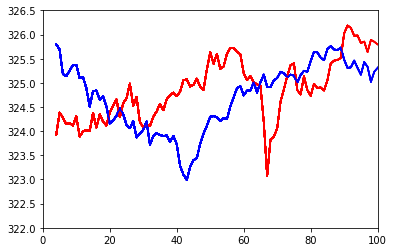

In [25]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
x = list(range(len(true_vs_pred)))
y1 = true_vs_pred['Predicted Close'].tolist()
y2 = true_vs_pred['True Close'].tolist()
for i in range(4,104):
    pl.plot(x[4:i+1],y1[4:i+1],'-r',label='Predicted Close')
    pl.plot(x[4:i+1],y2[4:i+1],'-b', label='True Close')
    pl.xlim(0, 100)
    pl.ylim(322, 326.5)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1.0)